In [6]:
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Color and Type Probability Charts

To start, let's bring in a few of the interesting datasets we saved from the previous workbook, and add them as variables. We will just look at color-given-typing and type-given-type, since these 2 give us an interesting view. Color given color, when plotted out, has way too much data and is not very readable.

In [7]:
def read_file(path_to_json):
    with open(path_to_json, encoding = 'utf-8') as f:
        data = f.read()
        json_data = json.loads(data) 
    return json_data

color_given_typing_likelihoods = read_file('./data/probabilities/color_given_type_likelihood.json')
type_given_type_likelihoods = read_file('./data/probabilities/type_pair_likelihood.json')

We will save all these into DataFrames, which makes it a lot easier to add/remove certain data, and also use it for the charts.

In [8]:
# Reuseable function to mask for certain percentage ranges
def mask_percents(df, lower_limit = 0, upper_limit = 1):

    mask_start = df >= lower_limit
    df_masked = df[mask_start]

    mask_stop = df_masked <= upper_limit
    df_masked = df_masked[mask_stop]

    return df_masked

In [9]:
def normalize_amounts(df, normalize_to = 1, flatten = False):

    totals = df.sum()

    if (flatten):
        flattened_df = df.transform(lambda x: x / x )
        totals = flattened_df.sum()
        new_df = flattened_df.transform(lambda x: ( x * normalize_to ) / totals[x.name] )
    else:
        new_df = df.transform(lambda x: ( x * normalize_to ) / totals[x.name] )

    return new_df

In [10]:
# Saving dataframe for Color given Typing
df_cgt = pd.DataFrame(color_given_typing_likelihoods)

# saving dataframe for Type given Type
df_tgt = pd.DataFrame(type_given_type_likelihoods)

In [11]:
def plot_data(df, title, xlabel, ylabel, lower_limit = 0, upper_limit = 1, size=(18, 6), use_color = True, legend = False, color_palette=[], normalize = False, flatten = False):
    
    fig = plt.figure(figsize = size)

    df_masked = mask_percents(df, lower_limit, upper_limit)
    if (normalize):
        if (flatten):
            df_masked = normalize_amounts(df_masked, flatten=True)
        else:
            df_masked = normalize_amounts(df_masked)

    df_masked = df_masked.transpose()
    df_masked = df_masked.fillna(0) # fill the NaN values with 0, so they can be added to the y_offset

    y_offset = np.zeros(len(df_masked.index))

    for index, col in enumerate(df_masked.columns):
        if (use_color):
            if (len(color_palette) > 0):
                _ = plt.bar(df_masked.index, df_masked[col], bottom = y_offset, color = color_palette[index], edgecolor = 'black', label = col)
            else:
                _ = plt.bar(df_masked.index, df_masked[col], bottom = y_offset, color = col, edgecolor = 'black', label = col)
        else:
            _ = plt.bar(df_masked.index, df_masked[col], bottom = y_offset, edgecolor = 'black', label = col)
        y_offset = y_offset + df_masked[col]

    plot_title = f'{title} - {str(round(lower_limit * 100, 2))}% to {str(round(upper_limit * 100, 2))}%'
    plt.title(plot_title)
    plt.ylabel(f'{ylabel}', fontsize = 15)
    plt.xlabel(xlabel, fontsize = 15)
    plt.xticks(rotation = 45, fontsize = 12)

    if legend:
        plt.legend(bbox_to_anchor=(1.1,1.05),
          ncol=1, fancybox=True, shadow=True)
        

    return fig

Let's start by seeing how the type-given-type data looks when plotted out.

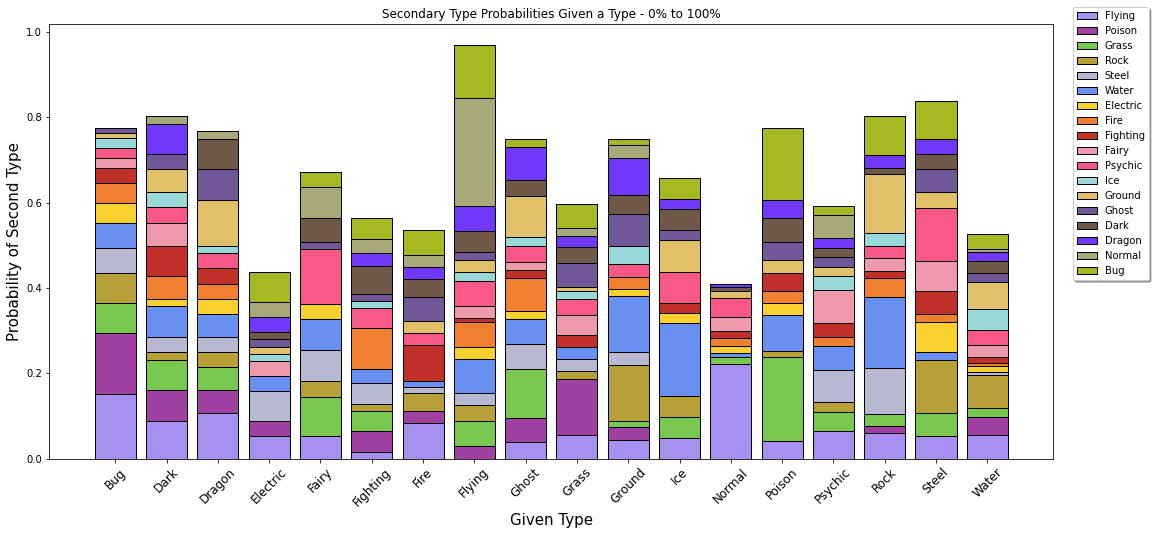

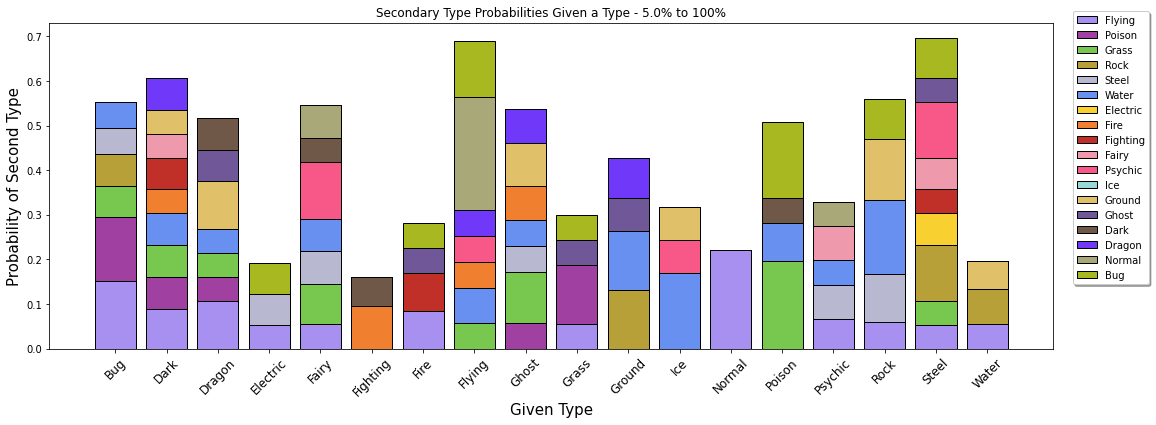

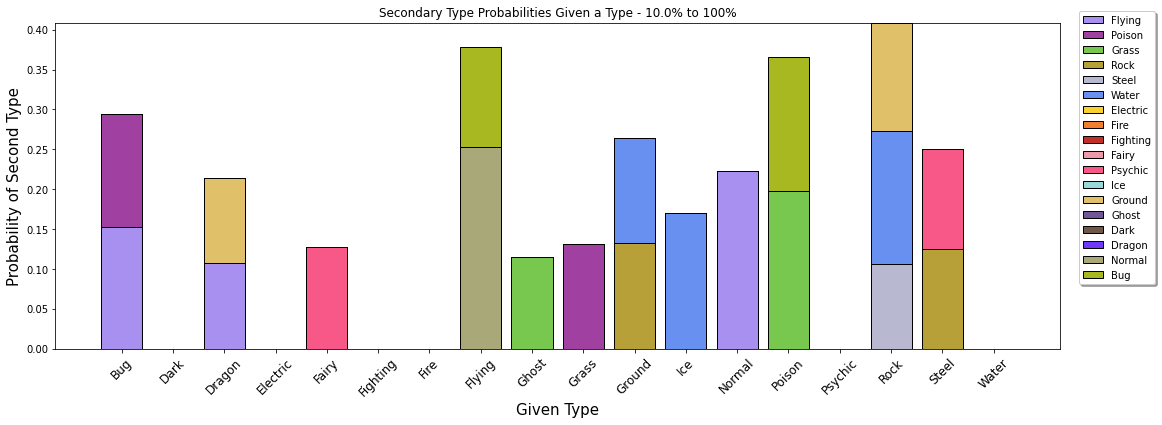

In [12]:
title = 'Secondary Type Probabilities Given a Type'
x = 'Given Type'
y = 'Probability of Second Type'

palette = ['#a890f0','#a040a0','#78c850','#b8a038','#b8b8d0','#6890f0','#f8d030','#f08030','#c03028','#ee99ac','#f85888','#98d8d8','#e0c068','#705898','#705848','#7038f8','#a8a878','#a8b820']

fig_tgt_1 = plot_data(df_tgt, title, x, y, size=(18,8), legend=True, color_palette = palette)

fig_tgt_2 = plot_data(df_tgt,  title, x, y, 0.05, 1, legend=True, color_palette = palette)

fig_tgt_3 = plot_data(df_tgt,  title, x, y, 0.10, 1, legend=True, color_palette = palette)


A more interesting probability chart to see is the probability that, given a type, it will be a certain color. We can plot this out in a stacked bar chart, to see the probabilities that a type will be a certain color. The resulting bar chart is basically a color palette for each type, which is pretty neat. It is probably the nicest because it lets you see the data without a key (since the stacked bars are just the colors themselves).

We can also use the masking from above to restrict to probabilities of 0.1 and up, 0.2 and up, etc, to see differing charts. From below, you can see that once it gets to 0.4 to 1, some types have no bars. This just means that the likelihoods for colors given those types is more equal (or there are more colors available for that type).

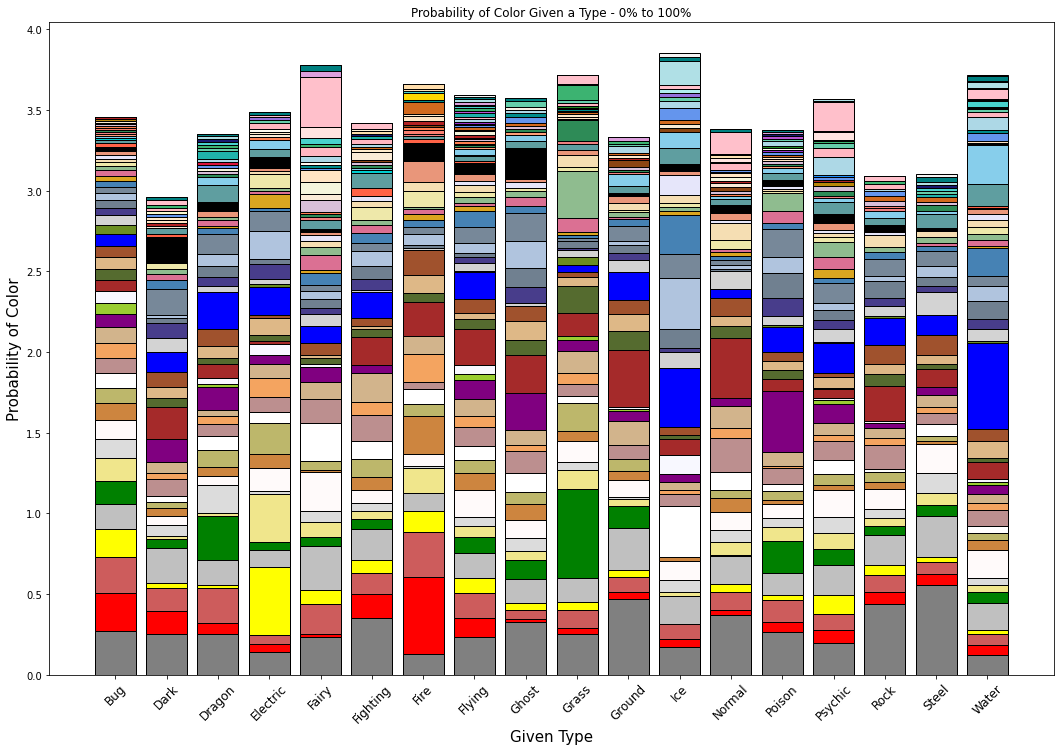

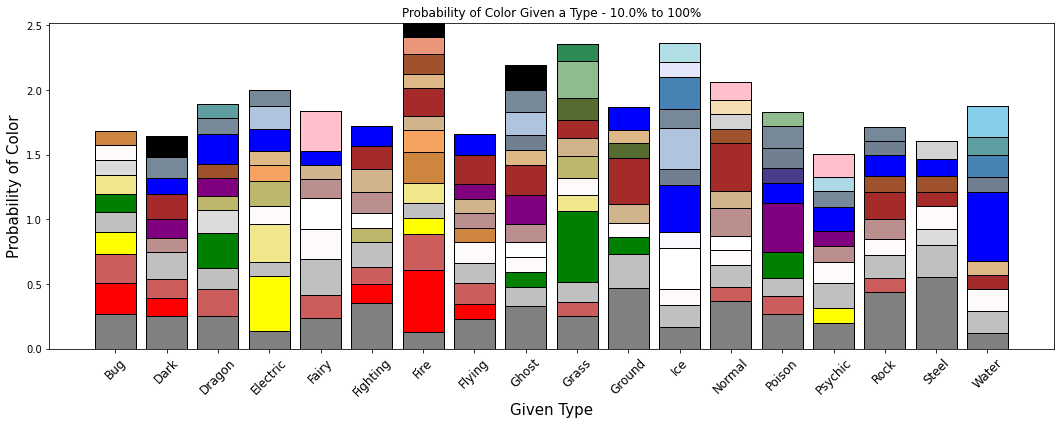

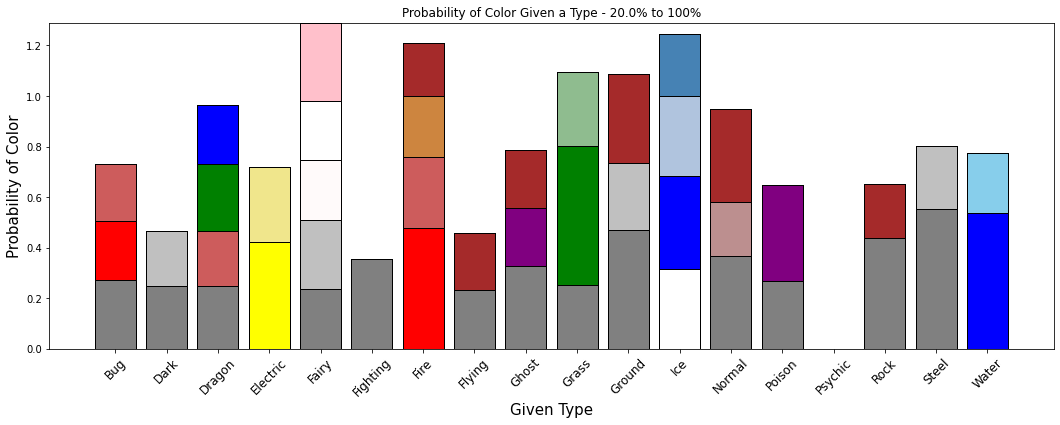

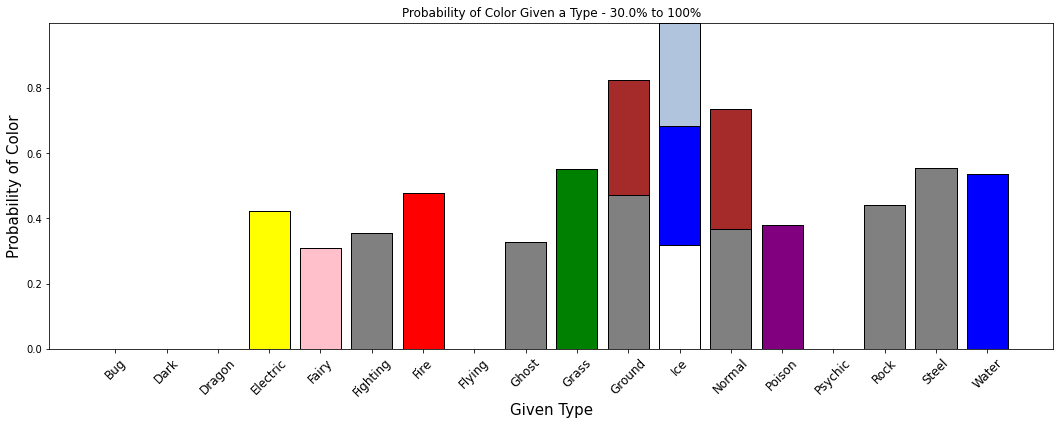

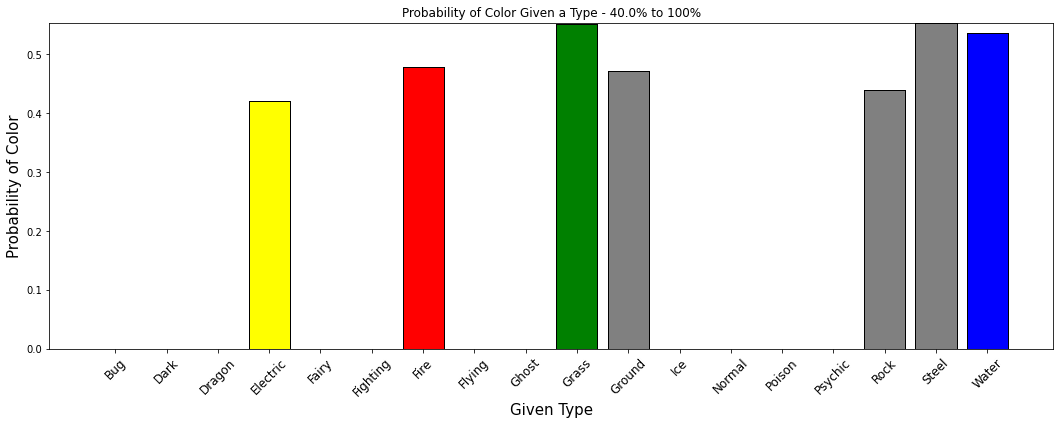

In [15]:
title = 'Probability of Color Given a Type'
x = 'Given Type'
y = 'Probability of Color'

fig_cgt_1 = plot_data(df_cgt, title, x, y, size=(18, 12), use_color=True)

fig_cgt_2 = plot_data(df_cgt, title, x, y, 0.10, 1, use_color=True)

fig_cgt_3 = plot_data(df_cgt, title, x, y, 0.20, 1, use_color=True)

fig_cgt_4 = plot_data(df_cgt, title, x, y, 0.30, 1, use_color=True)

fig_cgt_5 = plot_data(df_cgt, title, x, y, 0.40, 1, use_color=True)


Using the color-given-type data, we can even flatten out the charts so that we get a literal color palette for each type.

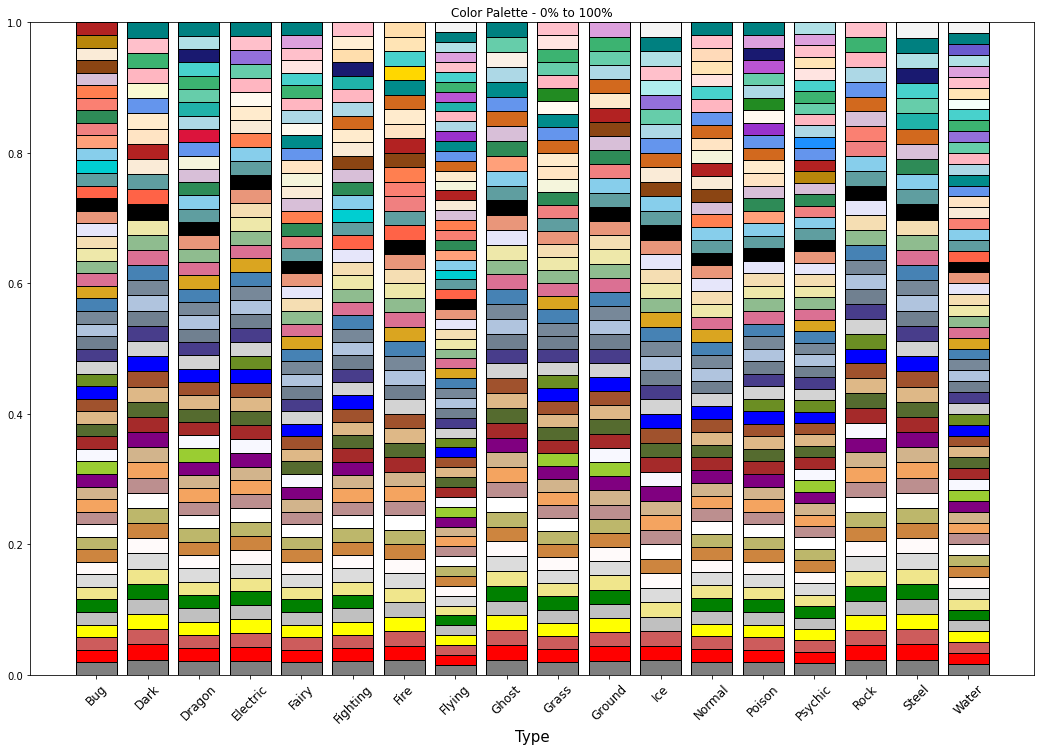

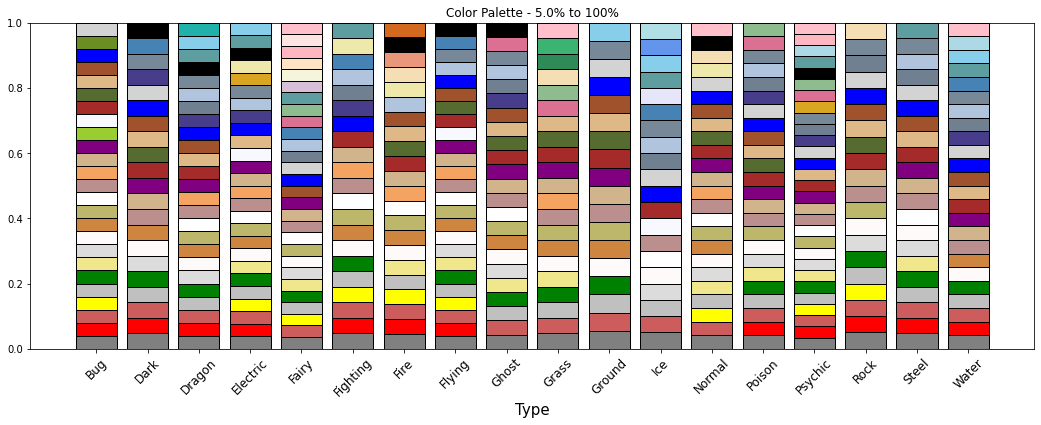

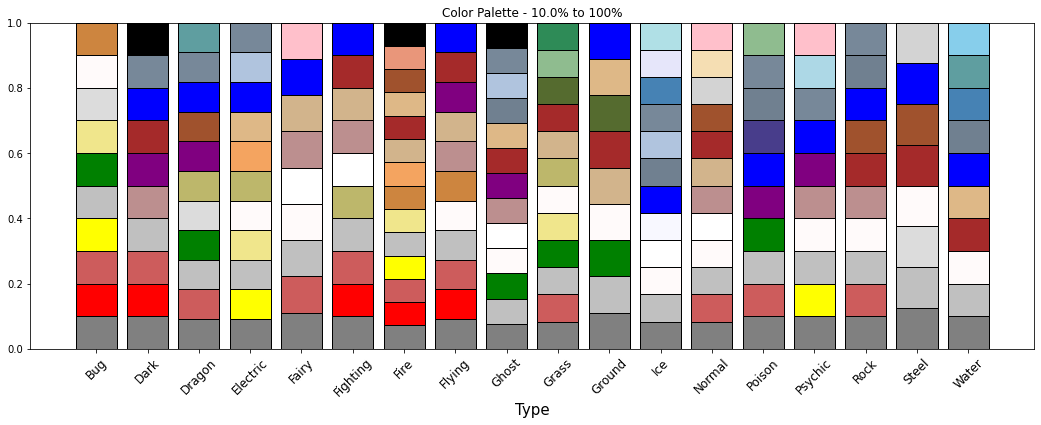

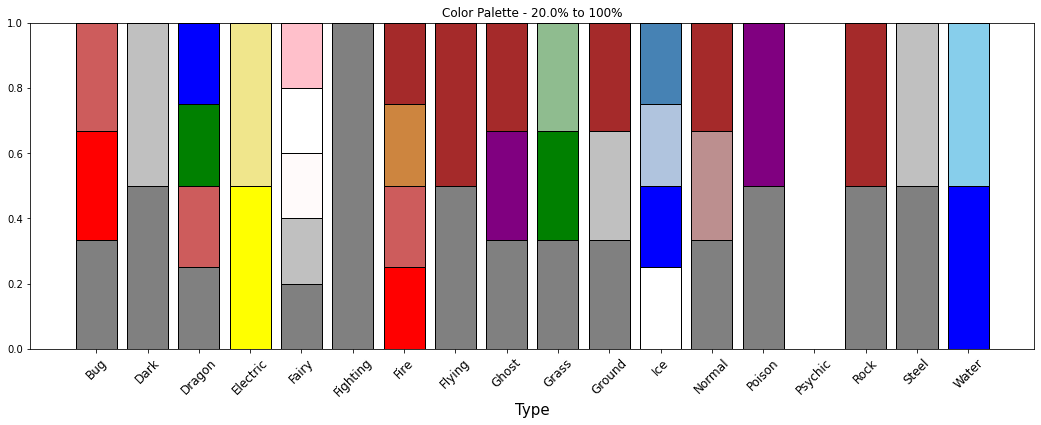

In [16]:
title = 'Color Palette'
x = 'Type'
y = ''

fig_cgt_palette_1 = plot_data(df_cgt, title, x, y, size=(18, 12), use_color=True, normalize=True, flatten=True)

fig_cgt_palette_2 = plot_data(df_cgt, title, x, y, 0.05, 1, use_color=True, normalize=True, flatten=True)

fig_cgt_palette_3 = plot_data(df_cgt, title, x, y, 0.10, 1, use_color=True, normalize=True, flatten=True)

fig_cgt_palette_4 = plot_data(df_cgt, title, x, y, 0.20, 1, use_color=True, normalize=True, flatten=True)
